In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [45]:
#Q1a

In [46]:
auto = pd.read_csv('/Users/liujingyang/Desktop/Auto.csv', na_values = '?')
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [47]:
#Q1b

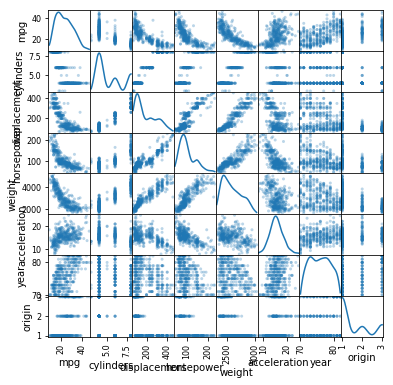

In [48]:
auto.dropna(inplace = True)
df_quant = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

df_quant = df_quant.astype(float)
scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6), diagonal = 'kde')
plt.show()

In [49]:
#Q1c

In [50]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [51]:
#Q1d

In [52]:
y = df_quant['mpg']
x = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                           'acceleration','year','origin']])
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        01:38:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(i). The coefficients of displacement, weight, year, and origin are statistically significant at the 1% level.

(ii). The coefficients of cylinders, horsepower, and acceleration are not statistically significant at the 10% level.

(iii). Ceteris paribus, one more year is associated with 0.75 unit increase in mpg.

In [53]:
#Q1e

In [54]:
df_quant['cylinders^2'] = np.square(df_quant['cylinders'])
df_quant['displacement^2'] = np.square(df_quant['displacement'])
df_quant['origin^2'] = np.square(df_quant['origin'])
df_quant['acceleration^2'] = np.square(df_quant['acceleration'])
x1 = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin',
                               'cylinders^2','displacement^2','origin^2','acceleration^2']])
reg1 = sm.OLS(y, x1)
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 20 Feb 2019   Prob (F-statistic):          2.99e-153
Time:                        01:38:27   Log-Likelihood:                -979.27
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     380   BIC:                             2030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2019      7.474     -0.

(i). Three variables are cylinders, displacement and origin.

(ii). Adjusted $R^2$ increases from 0.818 in part (d) to 0.853 in part (e), which is better because more of the variation in Y can be explained by the variables.

(iii). The coefficients on displacement and its squared term are both statistically significant at the 1% level.

(iv). The coefficients on cylinders and its squared term are both NOT statistically significant at the 10% level.

In [55]:
#Q1f

In [56]:
results1.predict([1, 6, 200, 100, 3100, 15.1, 99, 1, 6**2, 200**2, 1**2, 15.1**2])

array([38.67266199])

The predicted mpg is 38.67266199 of a car with cylinders displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1.


In [57]:
#Q2a

In [58]:
table = pd.DataFrame({"X1":[0,2,0,0,-1,1], "X2":[3,0,1,1,0,1],
                 "X3":[0,0,3,2,1,1],"Y":["Red","Red","Red","Green","Green","Red"]})
table["Dist"] = round(np.sqrt(table["X1"] ** 2 + table["X2"] ** 2 + table["X3"] ** 2),2)
table.index += 1
table

,X1,X2,X3,Y,Dist
1,0,3,0,Red,3.00
2,2,0,0,Red,2.00
3,0,1,3,Red,3.16
4,0,1,2,Green,2.24
5,-1,0,1,Green,1.41
6,1,1,1,Red,1.73


In [59]:
Dist1 = 3.00; Dist2 = 2.00; Dist3 = 3.16; Dist4 = 2.24; Dist5 = 1.41; Dist6 = 1.73

In [60]:
#Q2b

When K = 1, the closest point to the test point is the 5th observation (distance = 1.41). Therefore the KNN prediction is green.

In [61]:
#Q2c

When K = 3, the 3 closest neighbors are the 5th, the 6th, and the 2nd observations. Among the three points, 1/3 is green and 2/3 are red. Therefore the KNN prediction is red.

In [62]:
#Q2d

If the Bayes (optimal) decision boundary in this problem is highly nonlinear, then we would expect the best value for K to be small, because the model has low bias and high variance. In addition, With higher K, the decision boundary is smoother and closer to being linear.

In [63]:
#Q2e

In [64]:
KNN = KNeighborsClassifier(n_neighbors = 2)
neigh = KNN.fit(table[["X1","X2","X3"]], table["Y"])
print("The KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2:",
      neigh.predict([(0,0,0)])[0])

The KNN classifier of the test point X1 = X2 = X3 = 1 with K = 2: Green


In [65]:
#Q3a

In [66]:

df_quant['mpg high']=np.where(df_quant['mpg']>np.median(df_quant['mpg']),1,0)
X = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin']])
log1 = sm.Logit(df_quant['mpg high'], X)
results_log3 = log1.fit()
print(results_log3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        01:38:31   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

Coefficients of weight and year are statistically significant at the 5% level.

In [67]:
#Q3b

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, df_quant['mpg high'], 
                                                    test_size = 0.5, random_state=10)

In [69]:
#Q3c

In [70]:
log2 = LogisticRegression().fit(X_train, y_train)
coeff=pd.concat([pd.DataFrame(X.columns,columns=["Name"]),
                 pd.DataFrame(np.transpose(log2.coef_),columns=["Value"])],axis = 1)
coeff

,Name,Value
0,const,-0.068205
1,cylinders,-0.654085
2,displacement,0.005572
3,horsepower,-0.039046
4,weight,-0.004993
5,acceleration,-0.143490
6,year,0.300195
7,origin,-0.149389


In [71]:
#Q3d

In [72]:
y_pred = log2.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[86, 13],
       [12, 85]])

In [74]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



F1-scores are the same for high mpg and low mpg. Though precision of this model is slightly higher for low mpg, the model generally predicts equally well on low mpg and high mpg.